# Projekt zaliczeniowy

### W swoim projekcie uwzględniłam trzy oderębne zbiory danych dotyczących trzech różnych miast
### Każdy zbiór zawiera informacje dotyczące pogody z podziałem na każdy dzień w roku.
### Znajdziemy tam informacje o temperaturze maksymalnej, minimalnej, średniej z obydwu temperatur oraz informację o opadach deszczu.
### Zbiór jest w pełni kompletny, nie wymaga czyszczenia danych, więc nie dokonam żadnych modyfikacji.

Zaczynam od zaimportowania odpowiednich bibliotek oraz zbiorów danych

In [102]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [103]:
bar = pd.read_csv('C:/Users/user/Desktop/course/course-files/weather_barcelona.csv', index_col = 'Date')
rom = pd.read_csv('C:/Users/user/Desktop/course/course-files/weather_rome.csv', index_col = 'Date')
ams = pd.read_csv('C:/Users/user/Desktop/course/course-files/weather_amsterdam.csv', index_col = 'Date')

Przedstawione dane pogodowe dla trzech miast: Barcelony, Rzymu oraz Amsterdamu. 
Widzimy datę kiedy zostały wykonane pomiary temperatur- maksymalnej, minimalnej, opadów deszczu oraz średnich wyliczonych dla temperatury maksymalnej oraz minimalnej

In [9]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


In [11]:
bar.tail()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-03-27,16,8,0,17,10
2018-03-28,20,11,0,17,10
2018-03-29,17,12,0,17,10
2018-03-30,19,10,0,17,10
2018-03-31,19,10,0,17,10


Wykres przedstawiający wartości maksymalnych i minimalnych temperatury dla każdego dnia dla miasta Barcelona, Rzym oraz Amsterdam

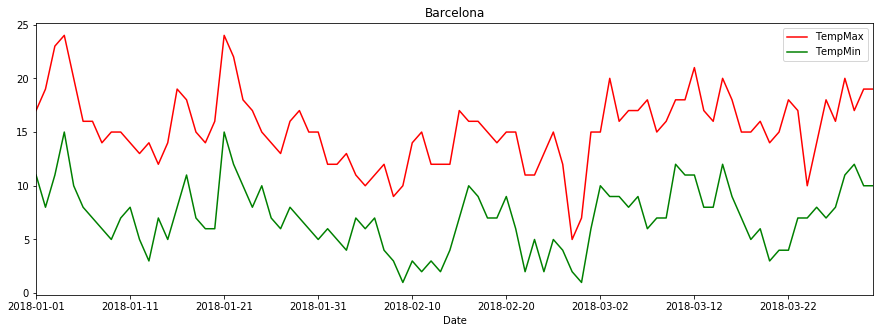

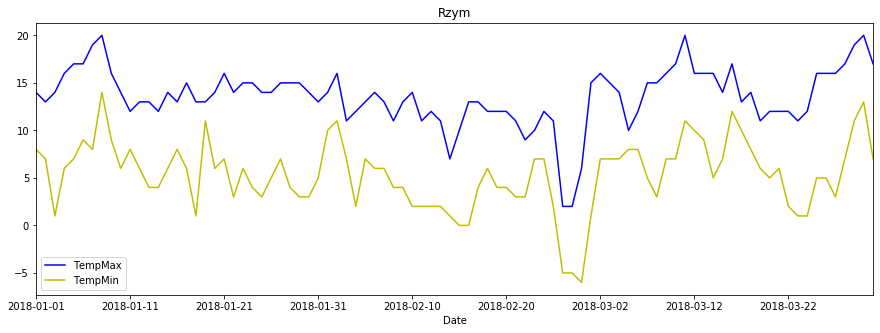

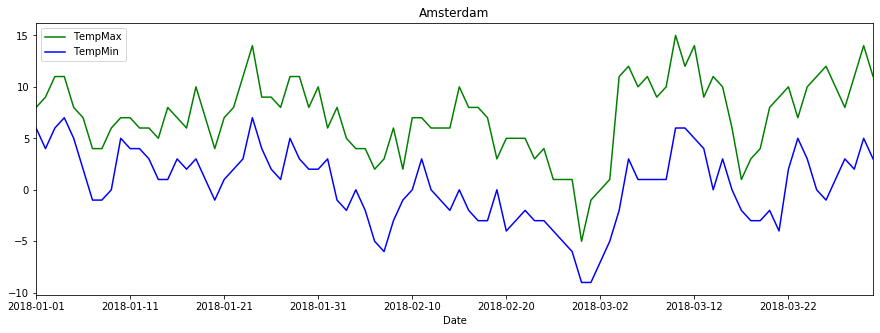

In [112]:
bar[['TempMax', 'TempMin']].plot(figsize=(15,5), title='Barcelona', colors=['r','g'])
rom[['TempMax', 'TempMin']].plot(figsize=(15,5),title='Rzym', colors=['b','y'])
ams[['TempMax', 'TempMin']].plot(figsize=(15,5),title='Amsterdam', colors=['g','b'])

Tworzę nowy obiekt temp_max z maksymalnymi temp z 3 miast

In [15]:
temp_max = pd.DataFrame(index= bar.index) 

In [16]:
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

In [92]:
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


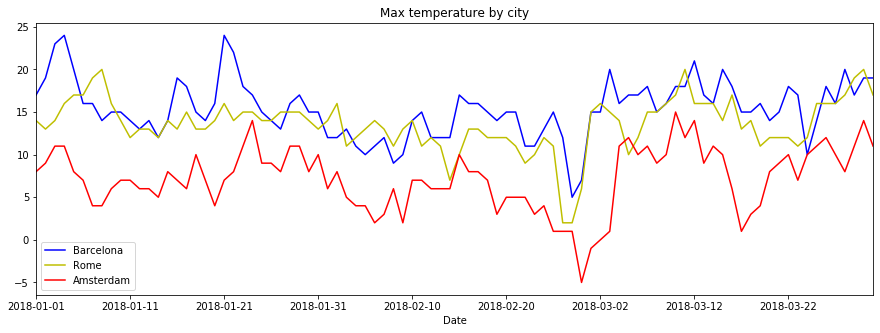

In [107]:
temp_max.plot(figsize=(15,5), title = 'Max temperature by city',colors=['b','y','r'])

Tworzę nowy obiekt temp_min z minimalnymi temp z 3 miast 

In [89]:
temp_min = pd.DataFrame(index= bar.index) 

In [90]:
temp_min['Barcelona'] = bar['TempMin']
temp_min['Rome'] = rom['TempMin']
temp_min['Amsterdam'] = ams['TempMin']

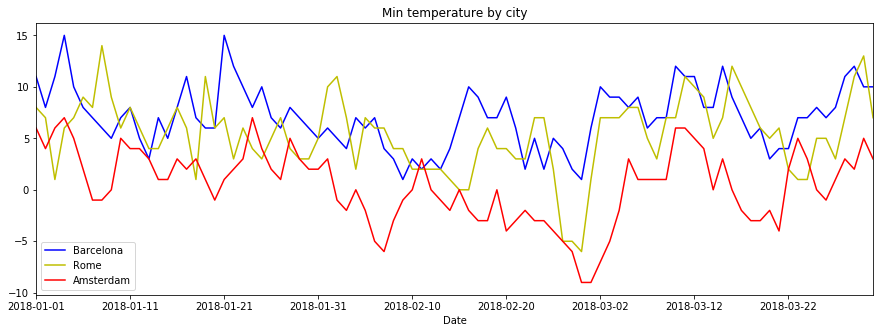

In [108]:
temp_min.plot(figsize=(15,5),title = 'Min temperature by city',colors=['b','y','r'])

Zauważamy, iż w Amsterdamie w badanych dniach było najchłodniej w porównaniu z pozostałymi dwoma miastami.

Wyraźnie widoczny jest gwałtowny spadek temperatury pod koniec lutego dla wszystkich trzech miast.
Najpierw miało to miejsce w Rzymie, następnie w Barcelonie, a ostatecznie w Amsterdamie.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000006A9E046A08>,
      dtype=object)

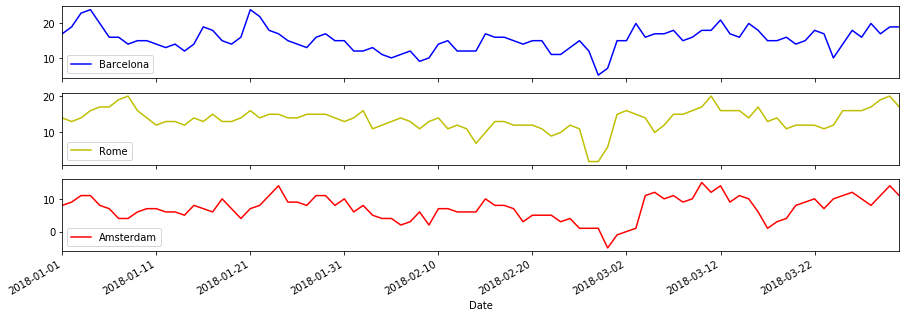

In [109]:
temp_max.plot(figsize=(15,5), subplots = True,colors=['b','y','r'])

Wykonuję kryterium podziału na podstawie temp średniej mierzonej każdego dnia.

Na jej podstawie tworzę warunek że dzień będzie traktowany jako ładny jeśli tego dnia zmierzona temperatura jest wyższa lub równa temperaturze średniej.

W ten sam sposób tworzę podział dla wszystkich dni dla trzech miast.

Tak sprawdzę czy dany dzień jest powyżej lub poniżej moich oczekiwań.

Do tego celu tworzę funkcję GradeDay- oceń dzień.

In [29]:
def GradeDay(row):
    if(row['TempMax'] >= row ["AvgTempMax"]):
        return 'Plus'
    else:
        return 'Minus'

In [30]:
rom['GradeDay']= rom.apply(GradeDay, axis=1)
bar['GradeDay']= bar.apply(GradeDay, axis=1)
ams['GradeDay']= ams.apply(GradeDay, axis=1)

In [31]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,Plus
2018-01-02,13,7,0,12,4,Plus
2018-01-03,14,1,0,12,4,Plus
2018-01-04,16,6,0,12,4,Plus
2018-01-05,17,7,0,12,3,Plus


In [99]:
rom['GradeDay'].value_counts()

Plus     70
Minus    20
Name: GradeDay, dtype: int64

In [97]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,17,11,0,13,7,Plus
2018-01-02,19,8,0,13,7,Plus
2018-01-03,23,11,0,13,7,Plus
2018-01-04,24,15,0,13,7,Plus
2018-01-05,20,10,0,13,7,Plus


In [100]:
bar['GradeDay'].value_counts()

Plus     64
Minus    26
Name: GradeDay, dtype: int64

In [98]:
ams.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,8,6,1,4,1,Plus
2018-01-02,9,4,5,4,1,Plus
2018-01-03,11,6,8,4,1,Plus
2018-01-04,11,7,1,4,1,Plus
2018-01-05,8,5,3,4,1,Plus


In [101]:
ams['GradeDay'].value_counts()

Plus     68
Minus    22
Name: GradeDay, dtype: int64

In [47]:
cities3 = pd.DataFrame(index = ['Minus', 'Plus'])

In [48]:
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()

In [49]:
cities3

,Barcelona,Rome,Amsterdam
Minus,26,20,22
Plus,64,70,68


Tworzę wykresy kołowe do utworzonych wyżej danych

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000006A9A341248>,
      dtype=object)

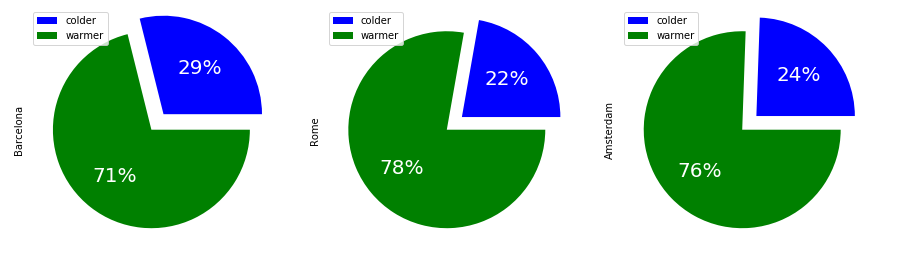

In [51]:
cities3.plot(kind = 'pie', subplots= True, figsize=(15,5), colors=['b','g'], labels=['colder','warmer'],
            autopct='%.0f%%', fontsize= 20, textprops=dict(color='w'), explode = (0.2,0))

Generuję wykres słupkowy dla tych samych danych.


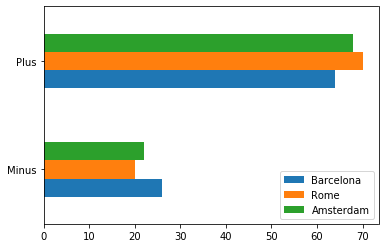

In [53]:
cities3.plot(kind='barh') 

In [54]:
temp_max

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8
...,...,...,...
2018-03-27,16,16,10
2018-03-28,20,17,8
2018-03-29,17,19,11


Przedstawienie wykresu pudełkowego dla temp_max, ukazującego wartości: średniej, minimalnej, maksymalnej, kwartyle(dolny i górny).
Obserwujemy, że największe zróżnicowanie temperaturowe na przestrzeni całego roku występuje w Amsterdamie.

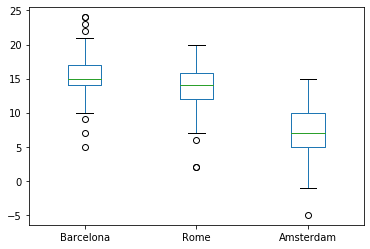

In [55]:
temp_max.plot(kind='box')

Histogram przedstawiający maksymalną temperaturę w Barcelonie, Rzymie oraz Amsterdamie na przestrzeni całego miesiąca.


In [58]:
bar['TempMax'].nunique() # sprawdzenie wartości nie unikalnych i uwzględnienie ich na histogramie

18

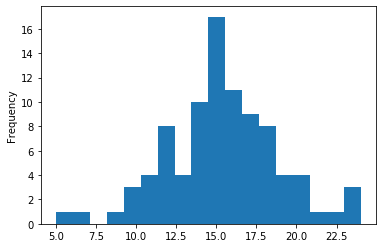

In [59]:
bar['TempMax'].plot(kind='hist', bins= 18)

In [60]:
rom['TempMax'].nunique()

14

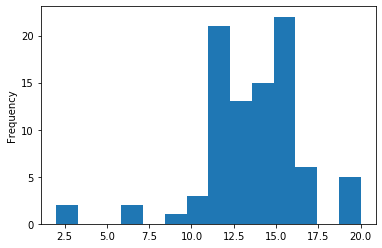

In [61]:
rom['TempMax'].plot(kind='hist', bins= 14)

In [62]:
ams['TempMax'].nunique()

17

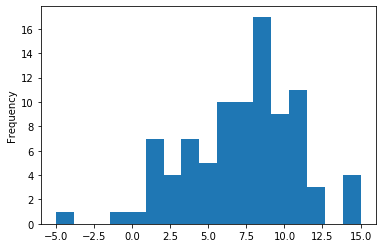

In [63]:
ams['TempMax'].plot(kind='hist', bins= 17)

Jeden wykres scatter dla trzech miast odnośnie TempMax oraz TempMin

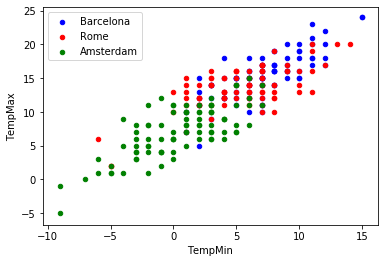

In [82]:
ax=bar.plot.scatter(x='TempMin', y='TempMax', color='Blue', label='Barcelona')
ay=rom.plot.scatter(x='TempMin', y='TempMax', color='Red', label = 'Rome', ax=ax)
ams.plot.scatter(x='TempMin', y='TempMax', color='Green', label = 'Amsterdam', ax=ay)

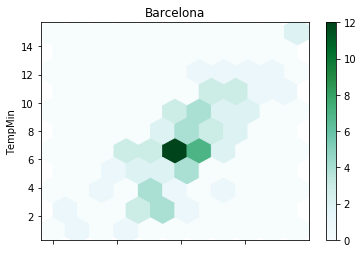

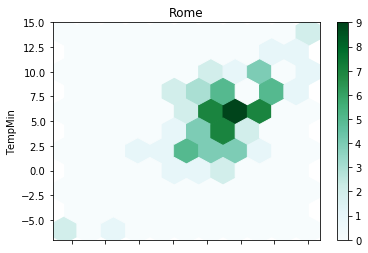

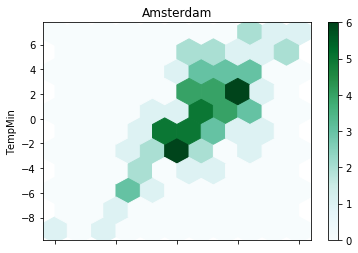

In [85]:
bar.plot.hexbin(x='TempMax', y='TempMin', gridsize=10, title = 'Barcelona')
rom.plot.hexbin(x='TempMax', y='TempMin', gridsize=10, title = 'Rome')
ams.plot.hexbin(x='TempMax', y='TempMin', gridsize=10, title = 'Amsterdam')

W powyższej analizie zauważamy, że największa rozbieżność temperaturowa występuje w Amsterdamie- jest to najbardziej widoczne na wykresie pudełkowym.
Natomiast miastem z największą ilością temperatury dodatniej jest Rzym. 